# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.2

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Display the data obtained on BTC through the API
btc_data = requests.get(btc_url).json()
btc_data

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 19767871,
   'total_supply': 19767871,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 65759.0,
     'volume_24h': 41673322953,
     'market_cap': 1298787736770,
     'percentage_change_1h': -0.0051705011857761,
     'percentage_change_24h': 1.64754823168075,
     'percentage_change_7d': 5.40949501432336,
     'percent_change_1h': -0.0051705011857761,
     'percent_change_24h': 1.64754823168075,
     'percent_change_7d': 5.40949501432336},
    'CAD': {'price': 89333.6015,
     'volume_24h': 56613209231.6505,
     'market_cap': 1764403140402.05,
     'percent_change_1h': -0.0051705011857761,
     'percent_change_24h': 1.64754823168075,
     'percent_change_7d': 5.40949501432336}},
   'last_updated': 1728984976}},
 'metadata': {'timestamp': 1728984976,
  'num_cryptocurrencies': 3120,
  'error': None}}

In [6]:
# Display the data obtained on ETH through the API
eth_data = requests.get(eth_url).json()
eth_data

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 120385428,
   'total_supply': 120385428,
   'max_supply': 120385428,
   'quotes': {'USD': {'price': 2616.04,
     'volume_24h': 19077360077,
     'market_cap': 315000950657,
     'percentage_change_1h': -0.145884132786277,
     'percentage_change_24h': 3.28166303957023,
     'percentage_change_7d': 7.90584359991658,
     'percent_change_1h': -0.145884132786277,
     'percent_change_24h': 3.28166303957023,
     'percent_change_7d': 7.90584359991658},
    'CAD': {'price': 3553.89034,
     'volume_24h': 25916593664.6045,
     'market_cap': 427928791467.535,
     'percent_change_1h': -0.145884132786277,
     'percent_change_24h': 3.28166303957023,
     'percent_change_7d': 7.90584359991658}},
   'last_updated': 1728984977}},
 'metadata': {'timestamp': 1728984977,
  'num_cryptocurrencies': 3120,
  'error': None}}

In [7]:
# Fetch current BTC price
btc_price = btc_data['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price
eth_price = eth_data['data']['1027']['quotes']['CAD']['price']


# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $107200.32
The current value of your 5.2 ETH is $18480.23


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEYID')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
alpaca = tradeapi.REST(
                alpaca_api_key,
                 alpaca_secret_key,
                 api_version = 'v2')

In [10]:
# Format current date as ISO format
start = pd.Timestamp('2023-10-13', tz = 'America/New_York').isoformat()
end = pd.Timestamp('2024-10-12', tz = 'America/New_York').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_prices = alpaca.get_bars(
                    tickers,
                    timeframe,
                    start = start,
                    end = end
                    ).df

# Reorganize the DataFrame
# Separate ticker data
df_agg = df_prices.loc[df_prices['symbol'] == 'AGG'].drop('symbol', axis = 1)
df_spy = df_prices.loc[df_prices['symbol'] == 'SPY'].drop('symbol', axis = 1)


# Concatenate the ticker DataFrames
df_tickers = pd.concat([df_agg, df_spy], axis = 1, keys = tickers)

# Format the index and Preview DataFrame
df_tickers.index = df_tickers.index.date
df_tickers.tail()

AGG                                                          \
            close    high      low trade_count   open   volume       vwap   
2024-10-07  99.62  99.765  99.5800       31145  99.64  6382168  99.646706   
2024-10-08  99.79  99.790  99.4900       23824  99.52  7340131  99.693590   
2024-10-09  99.53  99.670  99.4700       22838  99.64  8218472  99.567261   
2024-10-10  99.47  99.550  99.2338       23245  99.45  5757678  99.413555   
2024-10-11  99.50  99.620  99.3600       18227  99.41  4878672  99.525864   

               SPY                                                    \
             close      high       low trade_count    open    volume   
2024-10-07  567.80  571.9599  566.6300      457719  571.30  49964690   
2024-10-08  573.17  573.7800  569.5299      368103  570.42  37398693   
2024-10-09  577.14  577.7100  572.5500      380793  573.16  37912244   
2024-10-10  576.13  577.5800  574.4900      384802  575.77  44138060   
2024-10-11  579.58  580.3300  575.9100      369983  576.05  42267994   

                        
                  vwap  
2024-10-07  569.283676  
2024-10-08  571.958492  
2024-10-09  575.961585  
2024-10-10  575.914102  
2024-10-11  579.098683

In [11]:
# Pick AGG and SPY close prices
agg_close_price = df_tickers['AGG']['close'][-1]
spy_close_price = df_tickers['SPY']['close'][-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $99.5
Current SPY closing price: $579.58


In [12]:
# Compute the current value of shares
my_agg_value = my_spy * agg_close_price
my_spy_value = my_agg * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $115916.00
The current value of your 200 AGG shares is $4975.00


### Savings Health Analysis

In [13]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_asset = my_btc_value + my_eth_value
shares_asset = my_agg_value + my_spy_value

# Create savings DataFrame
asset = [crypto_asset, shares_asset]
types = ['crypto', 'shares']
df_savings = pd.DataFrame(asset, index = types)
df_savings.columns = ['amount']

# Display savings DataFrame
display(df_savings)

,amount
crypto,125680.551568
shares,120891.000000


<Axes: title={'center': 'Composition of Personal Savings'}, ylabel='amount'>

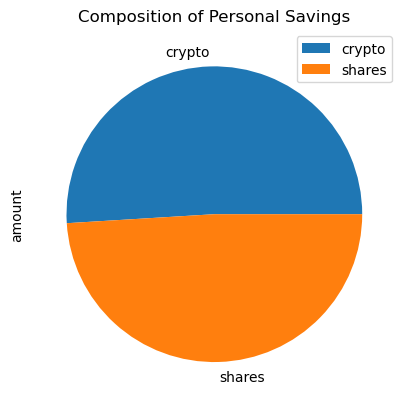

In [14]:
# Plot savings pie chart
df_savings.plot(kind = 'pie', y = 'amount',  title = 'Composition of Personal Savings')

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings = sum(asset)

# Validate saving health
if savings > emergency_fund:
    print('Congratulations! You have enough money in your emergency fund.')
    
elif savings == emergency_fund:
    print('You have reached your goal set for the savings')
    
elif savings < emergency_fund:
    print(f'You are ${emergency_fund - savings} away from your goal set for emergency fund')

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2019-10-13', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2024-10-12', tz='America/New_York').isoformat()

In [17]:
# Get 5 years' worth of historical data for SPY and AGG
df_tickers = alpaca.get_bars(
                    tickers,
                    timeframe,
                    start = start_date,
                    end = end_date
                    ).df


# Reorganize the DataFrame
# Separate ticker data
df_agg = df_tickers[df_tickers['symbol'] == 'AGG'].drop(['symbol'], axis = 1)
df_spy = df_tickers[df_tickers['symbol'] == 'SPY'].drop(['symbol'], axis = 1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([df_agg, df_spy], axis = 1, keys = tickers)

# Format the index of the dataframe
df_stock_data.index = df_stock_data.index.date

# Display sample data
df_stock_data.head()

AGG                                                             \
             close      high     low trade_count    open   volume        vwap   
2019-10-14  112.92  112.9300  112.82        7655  112.93  1824335  112.890774   
2019-10-15  112.57  112.9200  112.55       12910  112.90  4874267  112.625147   
2019-10-16  112.75  112.7900  112.62        9948  112.68  2561764  112.717431   
2019-10-17  112.72  112.8649  112.62        8413  112.67  2509007  112.757909   
2019-10-18  112.80  112.9090  112.73        7089  112.76  1534531  112.820230   

               SPY                                                              
             close     high      low trade_count    open    volume        vwap  
2019-10-14  296.03  296.670  295.570      191853  295.93  41283428  296.155111  
2019-10-15  298.88  299.700  296.970      262203  297.10  48895657  298.867063  
2019-10-16  298.46  299.160  297.920      243466  298.37  52994390  298.432208  
2019-10-17  299.21  300.240  298.515      242875  299.68  47733412  299.364958  
2019-10-18  298.09  299.395  296.990      278972  298.69  65642672  298.402675

In [18]:
# Set weights for the portfolio for AGG and SPY respectively
weights = [0.40, 0.60]

# Set a variable for the 30 years of trading days 
trading_days = 252*30

# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_30years = MCSimulation(df_stock_data,
                           weights = weights,
                           num_simulation = 500,
                           num_trading_days = trading_days)

In [19]:
# Printing the simulation input data
mc_30years.portfolio_data.head()

AGG                                                             \
             close      high     low trade_count    open   volume        vwap   
2019-10-14  112.92  112.9300  112.82        7655  112.93  1824335  112.890774   
2019-10-15  112.57  112.9200  112.55       12910  112.90  4874267  112.625147   
2019-10-16  112.75  112.7900  112.62        9948  112.68  2561764  112.717431   
2019-10-17  112.72  112.8649  112.62        8413  112.67  2509007  112.757909   
2019-10-18  112.80  112.9090  112.73        7089  112.76  1534531  112.820230   

                            SPY                                        \
           daily_return   close     high      low trade_count    open   
2019-10-14          NaN  296.03  296.670  295.570      191853  295.93   
2019-10-15    -0.003100  298.88  299.700  296.970      262203  297.10   
2019-10-16     0.001599  298.46  299.160  297.920      243466  298.37   
2019-10-17    -0.000266  299.21  300.240  298.515      242875  299.68   
2019-10-18     0.000710  298.09  299.395  296.990      278972  298.69   

                                               
              volume        vwap daily_return  
2019-10-14  41283428  296.155111          NaN  
2019-10-15  48895657  298.867063     0.009627  
2019-10-16  52994390  298.432208    -0.001405  
2019-10-17  47733412  299.364958     0.002513  
2019-10-18  65642672  298.402675    -0.003743

In [20]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_30years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007348,0.995933,1.003294,0.986852,1.014458,1.009778,0.994818,1.006056,1.013226,1.002510,...,0.997108,0.992670,0.997232,0.997847,1.000067,0.999519,0.990746,1.005354,0.999864,0.993900
2,1.007240,1.000482,0.992796,0.981494,1.014235,1.026752,1.004042,1.011923,1.014283,1.008997,...,1.007477,0.997259,0.995563,1.000470,0.997006,0.995302,0.996721,1.003234,0.993470,1.000477
3,1.006706,0.990446,1.001962,0.979650,1.017876,1.043643,1.001153,1.008782,1.029704,0.999501,...,1.012317,0.983122,0.999686,1.000273,0.985942,1.004850,0.996711,0.994346,1.000089,0.998092
4,1.013819,0.994646,1.005699,0.983513,1.012190,1.033864,0.988713,1.002180,1.022943,0.994196,...,1.020435,0.981016,0.994432,0.990066,0.989749,1.004059,1.005951,0.988830,1.007499,1.009122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.755550,24.066150,10.129775,21.519343,23.638596,17.743174,5.141066,10.803289,13.115416,11.208069,...,10.298172,5.741263,16.577664,18.803675,37.989637,5.206329,14.195638,4.997861,8.239504,6.387026
7557,8.733332,24.097038,10.163237,21.602921,23.876377,17.925923,5.130245,10.813088,13.068499,11.332793,...,10.285751,5.793847,16.554689,18.668838,38.367611,5.201237,14.317059,5.025341,8.163322,6.519955
7558,8.730567,23.854016,10.119849,21.498912,23.751353,18.058408,5.175532,10.890504,13.055456,11.311488,...,10.233124,5.805939,16.631197,18.602310,37.829432,5.207135,14.376635,4.991290,8.139990,6.564913
7559,8.823845,23.925953,10.161593,21.508659,23.969236,18.070546,5.191741,10.837487,13.134282,11.435751,...,10.151783,5.808621,16.531618,18.561127,37.846556,5.147426,14.420447,5.032540,8.056454,6.555356


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

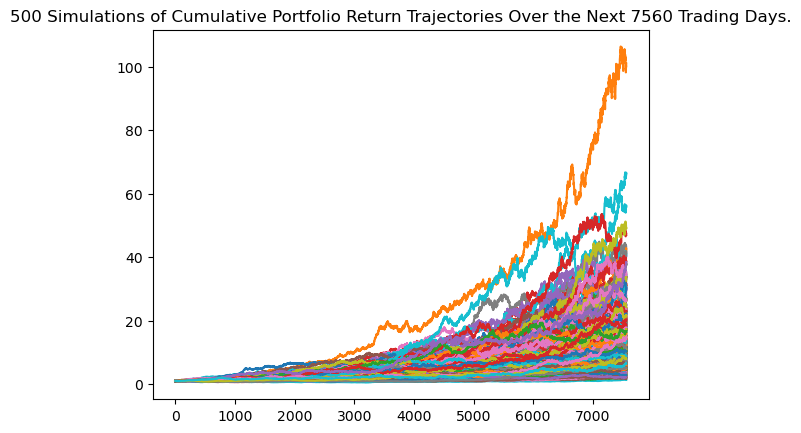

In [21]:
# Plot simulation outcomes
mc_30years.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

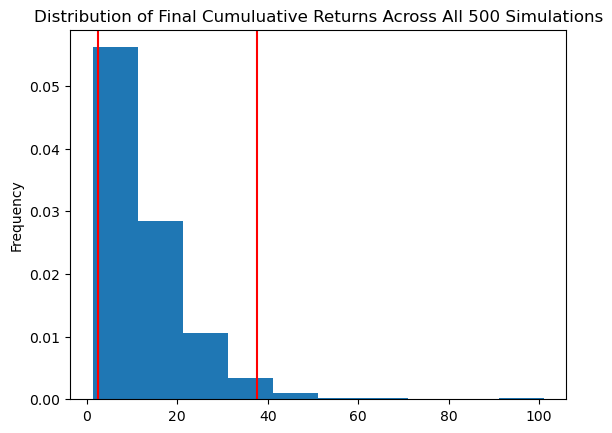

In [22]:
# Plot probability distribution and confidence intervals
mc_30years.plot_distribution()

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
simulation_summary = mc_30years.summarize_cumulative_return()

# Print summary statistics
print(simulation_summary)

count           500.000000
mean             12.791864
std               9.997412
min               1.332484
25%               5.705918
50%              10.019301
75%              17.238011
max             101.029238
95% CI Lower      2.466446
95% CI Upper     37.669136
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(simulation_summary[8] * initial_investment, 2)
ci_upper = round(simulation_summary[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $49328.92 and $753382.73


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [25]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(simulation_summary[8] * initial_investment, 2)
ci_upper = round(simulation_summary[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $73993.38 and $1130074.09


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
mc_5years = MCSimulation(df_stock_data,
                           weights = weights,
                           num_simulation = 500,
                           num_trading_days = 252*5)

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mc_5years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011279,1.008593,0.989825,1.001499,1.005934,1.004025,1.002710,1.023532,1.014546,0.999505,...,1.002966,0.999776,1.011608,1.001729,0.988937,0.998333,1.006876,0.993597,0.998561,0.984064
2,1.011109,1.018212,0.988660,0.999597,1.011956,0.999255,1.004396,1.019190,1.004708,0.999641,...,1.018369,1.001988,1.019779,0.992258,0.984641,1.006028,0.989416,0.984941,0.991388,0.989014
3,1.016299,1.019282,0.992150,1.005250,1.017356,1.007421,0.999393,1.012101,1.012711,1.019976,...,1.019017,0.999406,1.026692,0.980964,0.990983,0.999537,0.991530,0.993039,0.986065,0.979767
4,1.026073,1.023879,1.008522,1.015752,1.023372,1.006572,1.005571,1.014297,1.004845,1.010044,...,1.011735,1.002997,1.021755,0.966774,0.993192,0.996840,0.983916,1.000048,0.986627,0.981869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.158348,0.928849,1.543798,1.125908,1.867939,1.414491,1.164697,1.439030,1.392802,1.314969,...,1.714808,1.226387,1.616316,1.801182,1.903227,1.168726,1.134102,1.280291,1.585031,0.880190
1257,1.167838,0.933052,1.549157,1.123942,1.871451,1.415008,1.167030,1.427758,1.385263,1.307141,...,1.729815,1.226258,1.613614,1.804577,1.897312,1.161949,1.140398,1.304373,1.565751,0.878640
1258,1.169515,0.931855,1.545444,1.127545,1.875889,1.420297,1.174475,1.423643,1.382683,1.298748,...,1.720645,1.240006,1.609008,1.823163,1.904237,1.157364,1.142933,1.299524,1.542804,0.880447
1259,1.169212,0.933273,1.544337,1.149114,1.859319,1.422299,1.174615,1.414151,1.368094,1.295914,...,1.691857,1.217654,1.603522,1.836918,1.918226,1.155110,1.152007,1.295641,1.526546,0.876273


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

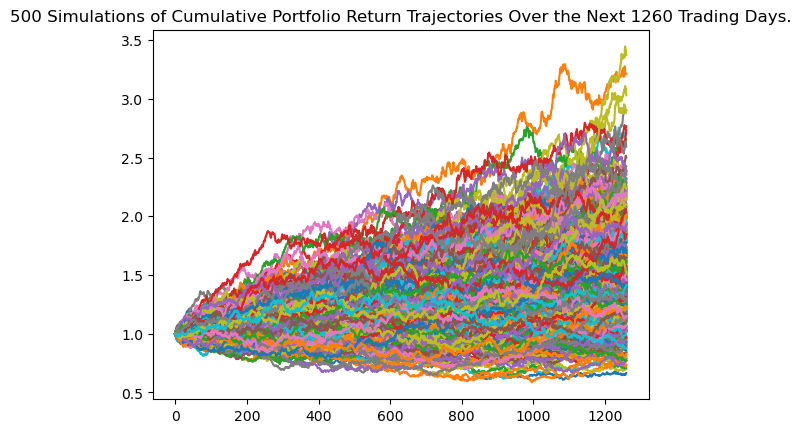

In [28]:
# Plot simulation outcomes
mc_5years.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

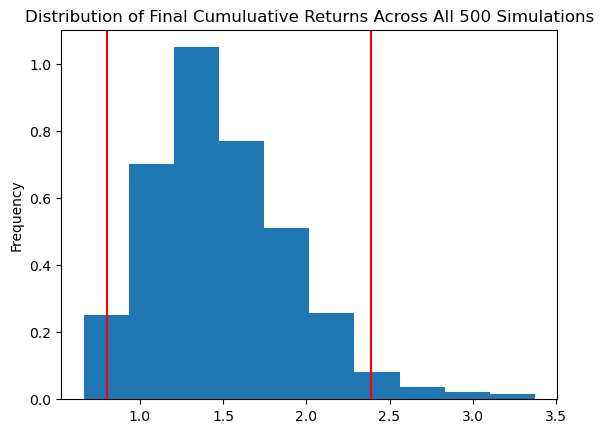

In [29]:
# Plot probability distribution and confidence intervals
mc_5years.plot_distribution()

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
simulation_summary_5years = mc_5years.summarize_cumulative_return()

# Print summary statistics
print(simulation_summary_5years)

count           500.000000
mean              1.505720
std               0.427158
min               0.664565
25%               1.197234
50%               1.426951
75%               1.746144
max               3.372762
95% CI Lower      0.803423
95% CI Upper      2.387583
Name: 1260, dtype: float64


In [31]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(simulation_summary_5years[8] * initial_investment , 2)
ci_upper_five = round(simulation_summary_5years[9] * initial_investment , 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $48205.39 and $143254.97


### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
mc_10years = MCSimulation(df_stock_data,
                           weights = weights,
                           num_simulation = 500,
                           num_trading_days = 252*10)

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mc_10years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.982729,0.999792,1.001855,0.996160,0.995030,1.004794,0.999326,0.998542,0.998383,0.997900,...,1.014069,0.996362,1.005224,0.998239,1.003209,1.003967,1.000988,0.986882,1.000897,0.990322
2,0.981517,0.995626,1.008620,1.009386,1.001848,1.007499,1.004069,1.007230,0.991323,1.001173,...,1.014541,0.999440,1.002020,1.003169,0.997041,1.006068,1.005478,0.987631,0.998749,0.994309
3,0.969282,1.004636,1.006906,1.004540,1.002658,1.011446,1.013734,0.998477,1.000553,1.003750,...,1.011026,0.994247,1.011299,1.003900,0.983876,1.018013,1.011504,0.986607,0.995000,0.987756
4,0.970566,1.002353,1.011356,1.016655,0.996358,1.030799,1.007055,1.002337,0.990302,0.998800,...,0.999519,0.995700,1.017804,1.012326,0.981536,1.020031,1.007156,0.983680,1.001375,0.977475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.452060,3.121455,1.838757,2.313521,2.502172,3.123626,1.640726,2.676032,2.373938,1.501792,...,1.978610,2.302124,2.071961,1.912801,3.641327,3.202594,1.601949,1.751636,1.638646,3.783561
2517,1.458967,3.113436,1.849652,2.323174,2.516053,3.132760,1.644401,2.716164,2.383282,1.524688,...,1.968427,2.265688,2.082925,1.925169,3.618095,3.206261,1.596695,1.738076,1.620584,3.750443
2518,1.455956,3.108177,1.849060,2.298847,2.541694,3.120213,1.631114,2.704177,2.372400,1.526849,...,1.985790,2.248828,2.089521,1.900475,3.564210,3.190095,1.596736,1.742684,1.615665,3.740439
2519,1.469937,3.082993,1.833530,2.301836,2.563809,3.156543,1.603965,2.715496,2.360107,1.527487,...,1.972140,2.235105,2.065717,1.897573,3.536312,3.193777,1.578903,1.746956,1.630579,3.711697


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

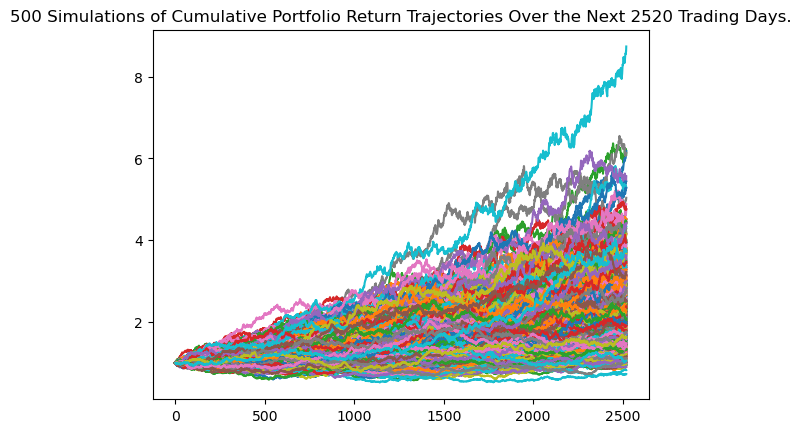

In [34]:
# Plot simulation outcomes
mc_10years.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

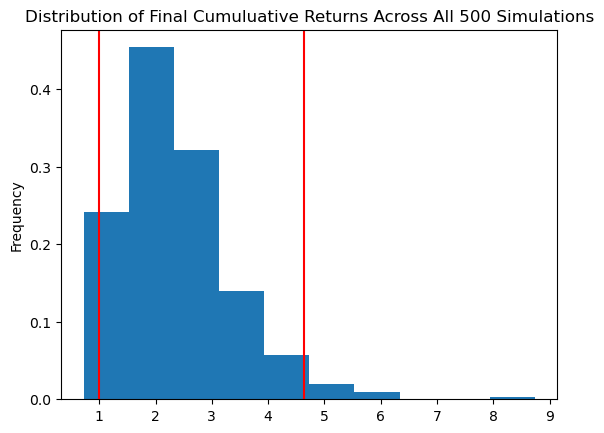

In [35]:
# Plot probability distribution and confidence intervals
mc_10years.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
simulation_summary_10years = mc_10years.summarize_cumulative_return()

# Print summary statistics
print(simulation_summary_10years)

count           500.000000
mean              2.347749
std               1.000197
min               0.726787
25%               1.616090
50%               2.168011
75%               2.841415
max               8.739442
95% CI Lower      0.994766
95% CI Upper      4.634007
Name: 2520, dtype: float64


In [37]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(simulation_summary_10years[8] * initial_investment,2)
ci_upper_ten = round(simulation_summary_10years[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $59685.98 and $278040.45
